In [1]:
!wget -nc https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/671/original/Date_Fruit_Datasets.zip

File ‘Date_Fruit_Datasets.zip’ already there; not retrieving.



In [2]:
!mkdir temp/data/
!unzip -n Date_Fruit_Datasets.zip -d temp/data/

mkdir: cannot create directory ‘temp/data/’: File exists
Archive:  Date_Fruit_Datasets.zip


In [3]:
import pandas as pd
df = pd.read_excel('temp/data/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

## D104Q1

In [4]:
corr = df.iloc[:, [1, 2, 3, 11]].corr()

comb = set()
for x in corr.columns:
    for y in corr.columns:
        if x == y:
            continue
        if ((x, y) in comb) or ((y, x) in comb):
            continue
        else:
            comb.add((x,y))

vals = {c: corr.loc[c[0], c[1]] for c in comb}

max(vals, key=lambda x: vals[x])

('PERIMETER', 'MAJOR_AXIS')

## D104Q2

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

from sklearn.metrics import classification_report

report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))
report.loc['precision'].idxmin()

'DEGLET'

## D104Q3

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

16


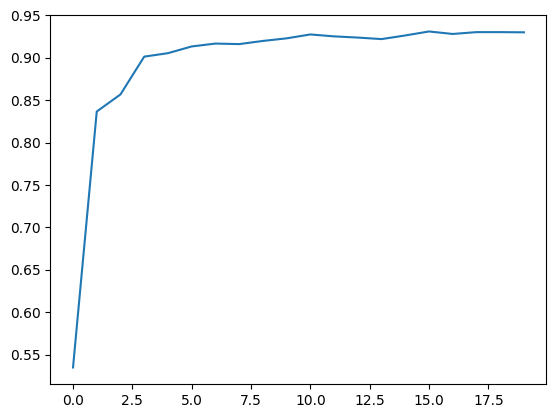

In [33]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
precision = []

from sklearn.svm import SVC  # SVC is in SVM 
from sklearn.feature_selection import RFE # RFE is in feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import numpy as np

for n in range(1, 21):
    
    # scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  

    # select
    ## selector object
    selector = RFE(
        estimator=SVC(kernel='linear', random_state=42),
        n_features_to_select=n
    )

    X_selected = selector.fit_transform(X=X_scaled, y=y)

    # model 
    model = SVC(kernel='linear', random_state=10)
    # evaluation
    precision.append(cross_val_score(model, X_selected, y, cv=cv, scoring='precision_weighted').mean()) 

print(np.argmax(precision)+1)

import matplotlib.pyplot as plt
plt.plot(precision)

## D104Q4

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


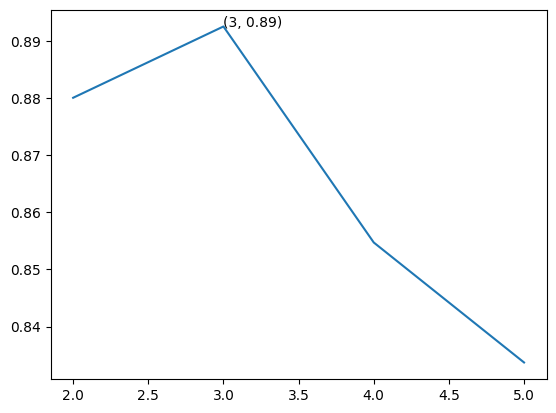

In [39]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

acc = []
pre = []
f1_ = []
d = [2, 3, 4, 5]

for degree in [2, 3, 4, 5]:
    model = SVC(kernel='poly', degree=degree, gamma='scale', random_state=10)

    accuracy = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean()  # TODO: Use the appropriate cross-validation function to get the mean accuracy
    precision = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='precision_weighted').mean()  # TODO: Provide the feature set and call the appropriate method to get the mean precision
    f1 = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1_weighted').mean()  # TODO: Specify the appropriate parameters for cross-validation

    acc.append(accuracy)
    pre.append(precision)
    f1_.append(f1)
    
plt.plot(d, pre)
xy = (d[np.argmax(pre)], float(max(pre)))
plt.annotate(text=f'({xy[0]}, {round(xy[1], 2)})', xy=xy)
plt.show()